In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


#Cel i opis zadania
Zadanie polega na przewidywaniu satysfakcji pasażera z linii lotniczej na podstawie różnych czynników, takich jak wiek, płeć, typ klienta, klasa obsługi, czas trwania lotu oraz wiele innych czynników związanych z komfortem i jakością obsługi podczas lotu. Można rozwiązać problem za pomocą klasyfikacji.

Dane: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Opis danych:

Gender - płeć pasażera (Kobieta, Mężczyzna)

Customer Type - typ klienta (Lojalny klient, Nielojalny klient)

Age - wiek pasażera

Type of Travel - cel podróży (Podróż prywatna, Podróż służbowa)

Class - klasa obsługi (Biznes, Ekonomiczna, Ekonomiczna Plus)

Flight distance - dystans lotu

Inflight wifi service - satysfakcja z usługi Wi-Fi na pokładzie (0: nie dotyczy; 1-5)

Departure/Arrival time convenient - satysfakcja z czasów wylotu/przylotu

Ease of Online booking - satysfakcja z procesu rezerwacji online

Gate location - satysfakcja z lokalizacji bramki

Food and drink - satysfakcja z jedzenia i napojów na pokładzie

Online boarding - satysfakcja z procesu odprawy online

Seat comfort - satysfakcja z komfortu siedzenia

Inflight entertainment - satysfakcja z systemu rozrywki na pokładzie

On-board service - satysfakcja z obsługi na pokładzie

Leg room service - satysfakcja z przestrzeni na nogi

Baggage handling - satysfakcja z obsługi bagażu

Check-in service - satysfakcja z procesu odprawy

Inflight service - satysfakcja z usługi na pokładzie

Cleanliness - satysfakcja z czystości w samolocie

Departure Delay in Minutes - opóźnienie wylotu w minutach

Arrival Delay in Minutes - opóźnienie przylotu w minutach

Satisfaction - poziom satysfakcji pasażera (Zadowolony, Neutralny/Niezadowolony)


#Czytanie danych

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
#Sprawdzamy informacje o danych: liczba brakujących wartości oraz typy danych.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

#Czyszczenie danych

In [ ]:
df = df.drop(columns=['id', 'Unnamed: 0'])

In [ ]:
#Przekształcimy kategoryczne zmienne na zmienne numeryczne
categorical_features = df.select_dtypes(
    object).columns.tolist()

df[categorical_features] = df[categorical_features].apply(
    lambda col: col.astype('category'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             25976 non-null  category
 1   Customer Type                      25976 non-null  category
 2   Age                                25976 non-null  int64   
 3   Type of Travel                     25976 non-null  category
 4   Class                              25976 non-null  category
 5   Flight Distance                    25976 non-null  int64   
 6   Inflight wifi service              25976 non-null  int64   
 7   Departure/Arrival time convenient  25976 non-null  int64   
 8   Ease of Online booking             25976 non-null  int64   
 9   Gate location                      25976 non-null  int64   
 10  Food and drink                     25976 non-null  int64   
 11  Online boarding                    25976 

In [ ]:
#Sprzwdzamy wartości brakujące
df.isna().sum() / len(df) * 100

,0
Gender,0.000000
Customer Type,0.000000
Age,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,0.000000
Inflight wifi service,0.000000
Departure/Arrival time convenient,0.000000
Ease of Online booking,0.000000
Gate location,0.000000


In [ ]:
# Wypełniamy brakujące wartości w kolumnie 'Arrival Delay in Minutes' medianą
dict_fill = {'Arrival Delay in Minutes': df['Arrival Delay in Minutes'].median()}
df = df.fillna(dict_fill)

In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


#Univariate Analysis

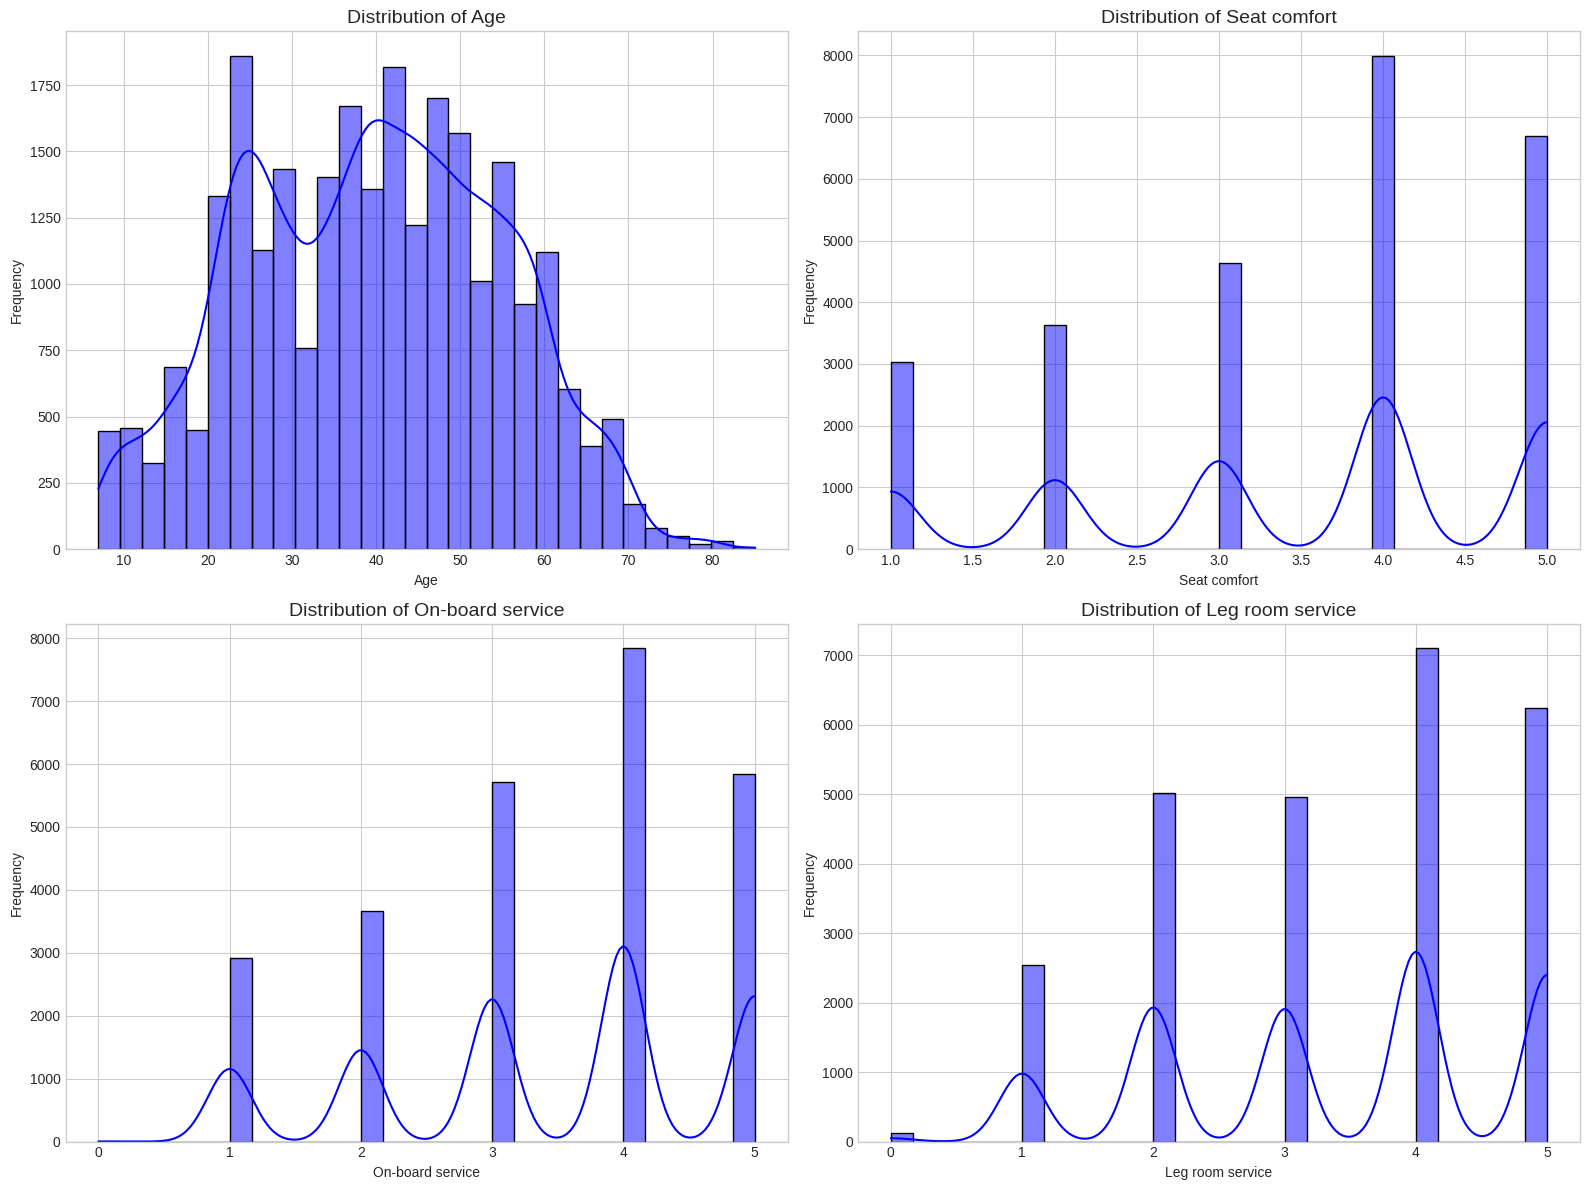

In [ ]:
columns_to_plot = ['Age', 'Seat comfort', 'On-board service', 'Leg room service']

plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Większość pasażerów jest w wieku od około 20 do 50 lat, co może oznaczać, że linia lotnicza jest popularna wśród osób aktywnych zawodowo.

Wykres dystrybucji pokazuje skrajne oceny komfortu siedzenia. Wygląda na to, że pasażerowie oceniają tę cechę bardzo nisko lub bardzo wysoko, co może wskazywać na istotność tej kategorii w zadowoleniu.

Oceny takie jak „On-board service” i „Leg room service” mają rozkłady, które pokazują, że większość ocen koncentruje się na średnich lub niższych wartościach, co może wskazywać obszary do poprawy, aby zwiększyć ogólną satysfakcję pasażerów.

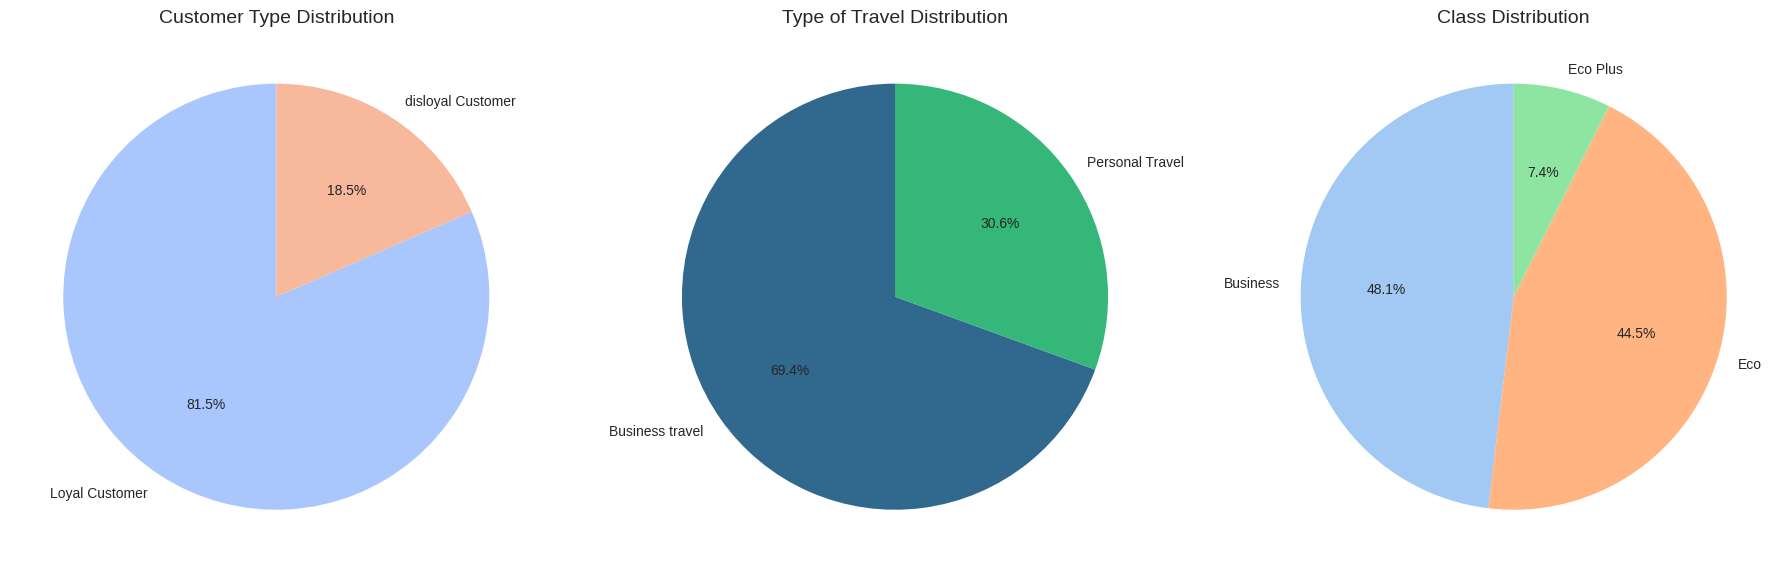

In [ ]:
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
customer_type_counts = df['Customer Type'].value_counts()
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(customer_type_counts)))
plt.title('Customer Type Distribution', fontsize=14)


plt.subplot(1, 3, 2)
type_of_travel_counts = df['Type of Travel'].value_counts()
plt.pie(type_of_travel_counts, labels=type_of_travel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(type_of_travel_counts)))
plt.title('Type of Travel Distribution', fontsize=14)


plt.subplot(1, 3, 3)
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(class_counts)))
plt.title('Class Distribution', fontsize=14)

plt.tight_layout()
plt.show()


Większość klientów to lojalni pasażerowie (81,5%). Utrzymanie ich zadowolenia powinno być priorytetem.

Głównym celem podróży jest biznes (69,4%), co sugeruje, że linia lotnicza powinna dostosowywać usługi do potrzeb pasażerów biznesowych.

W podziale na klasy największa część pasażerów podróżuje klasą ekonomiczną (48,1%), co wskazuje, że zadowolenie w tej klasie powinno być monitorowane szczególnie.

<ipython-input-22-4659448fb68f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Flight Distance'], shade=True, color='blue')


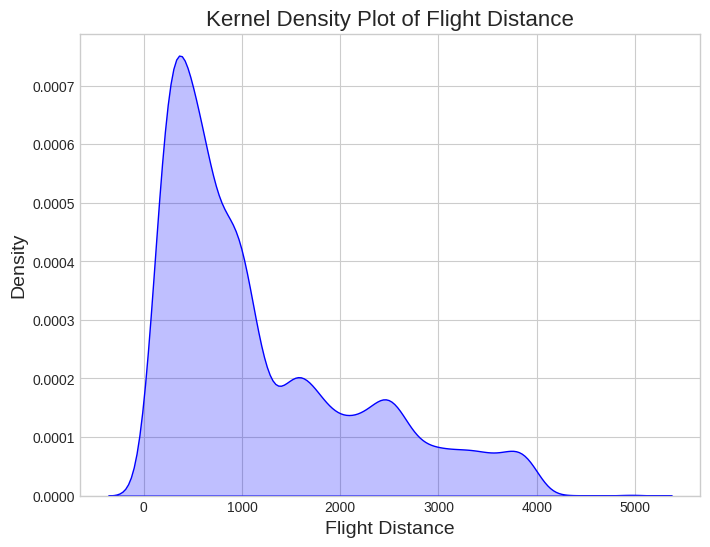

In [ ]:
# Kernel Density Plot for 'Flight Distance'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Flight Distance'], shade=True, color='blue')
plt.title('Kernel Density Plot of Flight Distance', fontsize=16)
plt.xlabel('Flight Distance', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Większość lotów obejmuje krótsze dystanse (do 1000 km), a liczba dłuższych lotów spada z dystansem.

#Bivariate Analysis


<ipython-input-4-5d832217a5de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="satisfaction", y="Inflight wifi service", data=df, palette={'satisfied': 'limegreen', 'neutral or dissatisfied': 'tomato'} , alpha=0.7)


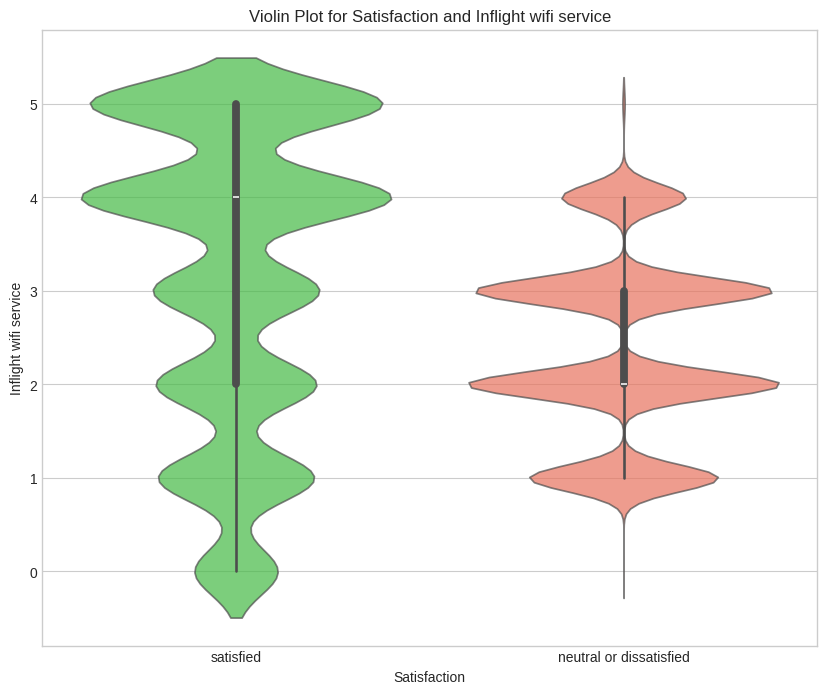

In [ ]:
plt.figure(figsize=(10, 8))

sns.violinplot(x="satisfaction", y="Inflight wifi service", data=df, palette={'satisfied': 'limegreen', 'neutral or dissatisfied': 'tomato'} , alpha=0.7)

plt.title('Violin Plot for Satisfaction and Inflight wifi service')
plt.xlabel('Satisfaction')
plt.ylabel('Inflight wifi service')
plt.show()

Zielony wykres (zadowoleni pasażerowie) wskazuje, że dostęp do Wi-Fi jest istotny dla tych, którzy oceniają lot pozytywnie.

Czerwony wykres (niezadowoleni pasażerowie) ma większe rozproszenie ocen, co sugeruje, że brak dostępu lub niska jakość Wi-Fi istotnie wpływają na negatywną ocenę lotu.

<ipython-input-5-cabcebef983d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


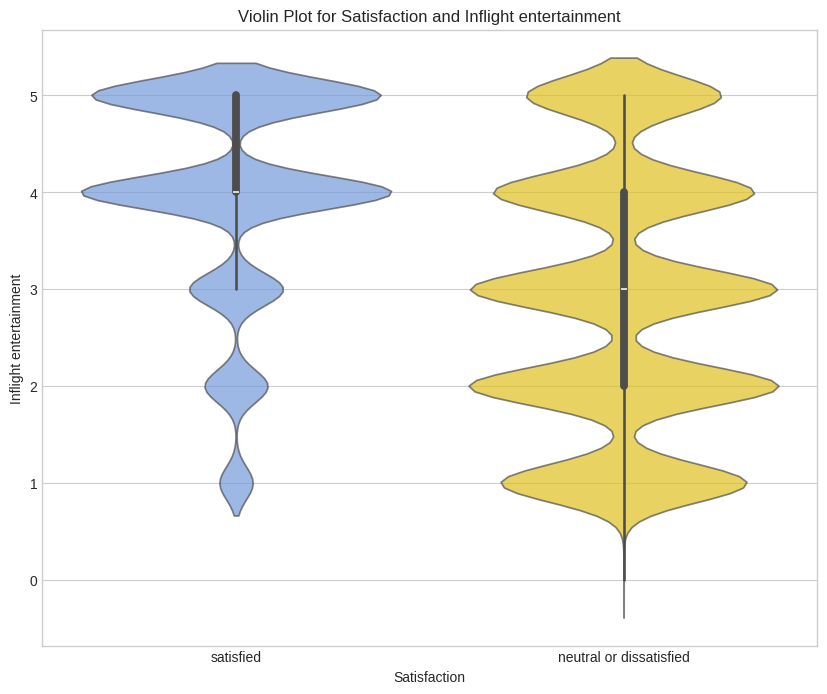

In [ ]:
plt.figure(figsize=(10, 8))

sns.violinplot(
    x="satisfaction",
    y="Inflight entertainment",
    data=df,
   palette={'satisfied': 'cornflowerblue', 'neutral or dissatisfied': 'gold'},
    alpha=0.7
)

plt.title('Violin Plot for Satisfaction and Inflight entertainment')
plt.xlabel('Satisfaction')
plt.ylabel('Inflight entertainment')
plt.show()

Pasażerowie z wyższą oceną satysfakcji generalnie przyznają wyższe oceny dla rozrywki pokładowej (większa gęstość dla wyższych wartości oceny).

Niższa satysfakcja wiąże się ze znaczną zmiennością ocen dla rozrywki pokładowej, co może sugerować, że jakość tego czynnika może być nierówna.

<ipython-input-6-a6089f3faf66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


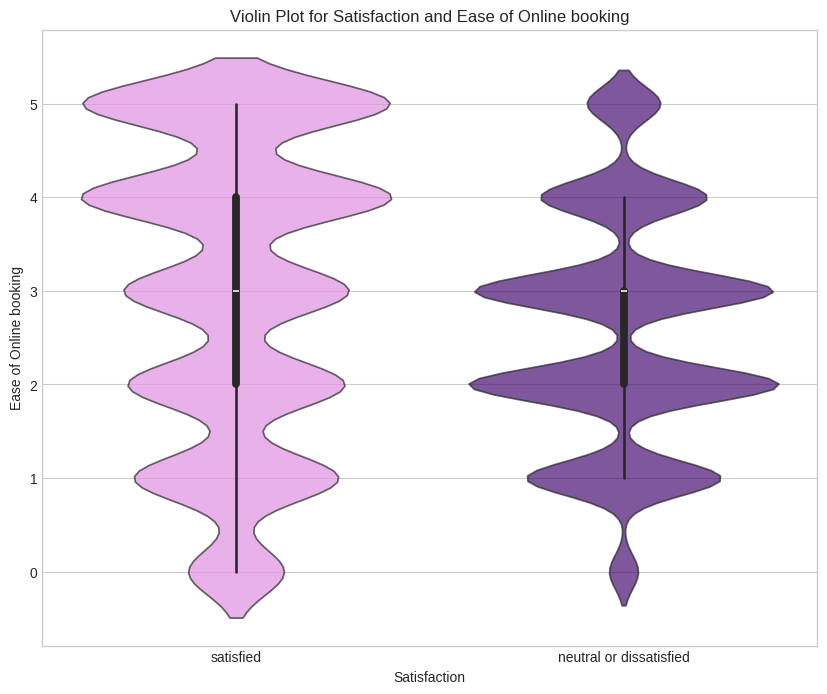

In [ ]:
plt.figure(figsize=(10, 8))

sns.violinplot(
    x="satisfaction",
    y="Ease of Online booking",
    data=df,
   palette={'satisfied': 'violet', 'neutral or dissatisfied': 'indigo'},
    alpha=0.7
)

plt.title('Violin Plot for Satisfaction and Ease of Online booking')
plt.xlabel('Satisfaction')
plt.ylabel('Ease of Online booking')
plt.show()

Pasażerowie zadowoleni oceniają łatwość rezerwacji online wyżej. Rozkład ocen dla niezadowolonych pasażerów jest bardziej rozproszony, co może wskazywać na większe różnice indywidualne w odczuciach tej grupy.

<ipython-input-7-37c580075e4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


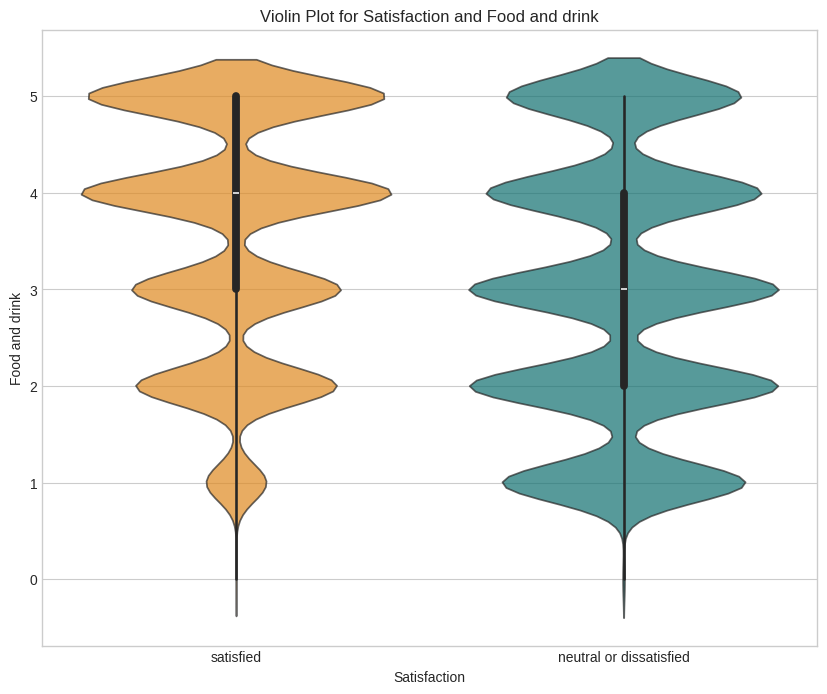

In [ ]:
plt.figure(figsize=(10, 8))

sns.violinplot(
    x="satisfaction",
    y="Food and drink",
    data=df,
   palette={'satisfied': 'darkorange', 'neutral or dissatisfied': 'teal'},
    alpha=0.7
)

plt.title('Violin Plot for Satisfaction and Food and drink')
plt.xlabel('Satisfaction')
plt.ylabel('Food and drink')
plt.show()

Wykres pokazuje rozkład ocen dla kategorii jedzenia i napojów. Zadowoleni pasażerowie mają tendencję do wyższych ocen, natomiast dla pasażerów niezadowolonych lub neutralnych rozkład jest bardziej zróżnicowany i przesunięty w dół.

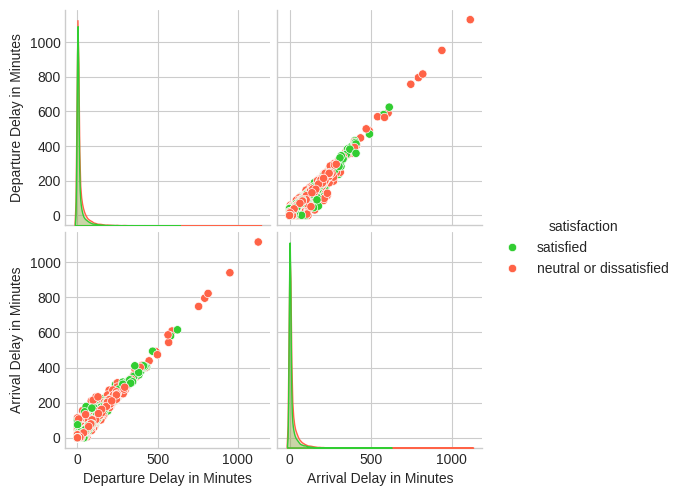

In [ ]:
columns_for_pairplot = ['Departure Delay in Minutes',
                        'Arrival Delay in Minutes', 'satisfaction']

pairplot_data = df[columns_for_pairplot]

sns.pairplot(pairplot_data, hue='satisfaction', palette={'satisfied': 'limegreen', 'neutral or dissatisfied': 'tomato'}, diag_kind='kde')

plt.show()

Istnieje wyraźna korelacja między opóźnieniami przy odlotach a opóźnieniami przy przylotach. Pasażerowie bardziej zadowoleni („satisfied”) są mniej reprezentowani w obszarach z dużymi opóźnieniami.
Wychodzi na to, że opóźnienia mogą być jednym z ważniejszych czynników wpływających na poziom zadowolenia pasażerów.

<ipython-input-13-43a447fb1ae1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Checkin service', data=df, palette='coolwarm')
<ipython-input-13-43a447fb1ae1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Inflight service', data=df, palette='viridis')


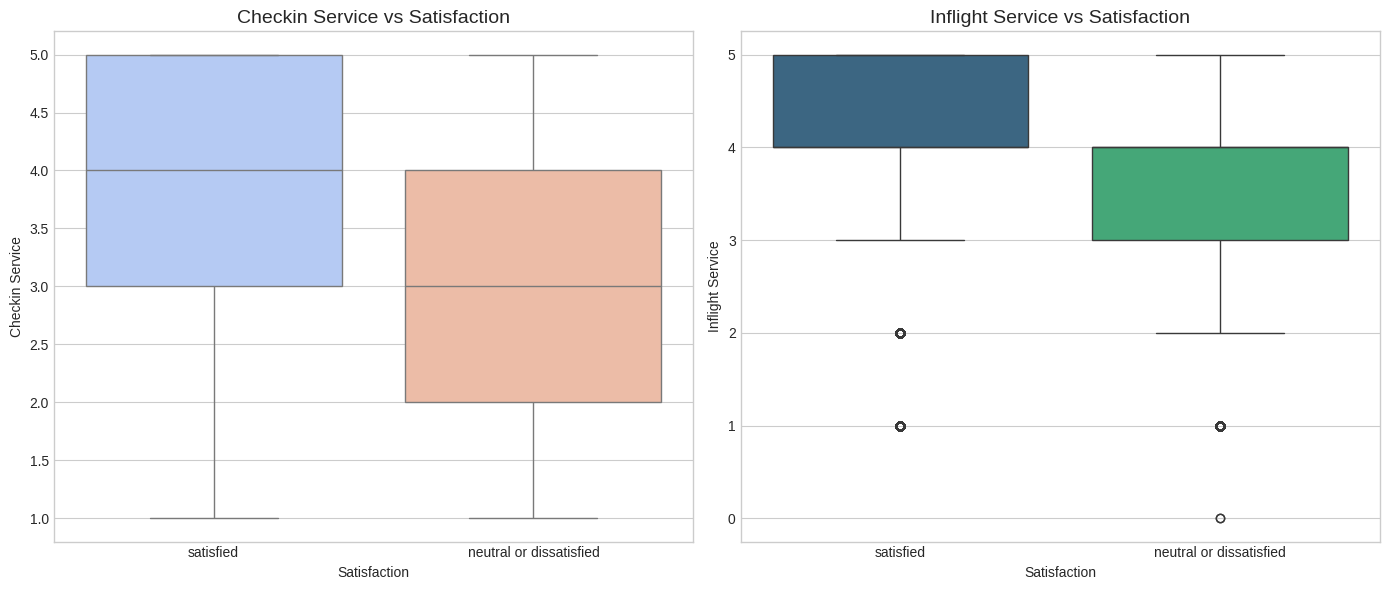

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction', y='Checkin service', data=df, palette='coolwarm')
plt.title('Checkin Service vs Satisfaction', fontsize=14)
plt.xlabel('Satisfaction')
plt.ylabel('Checkin Service')


plt.subplot(1, 2, 2)
sns.boxplot(x='satisfaction', y='Inflight service', data=df, palette='viridis')
plt.title('Inflight Service vs Satisfaction', fontsize=14)
plt.xlabel('Satisfaction')
plt.ylabel('Inflight Service')

plt.tight_layout()
plt.show()

Pasażerowie zadowoleni z obsługi check-in oraz serwisu podczas lotu mają wyższe oceny tych usług w porównaniu do pasażerów neutralnych lub niezadowolonych.


#Multivariate Analysis

In [ ]:
px.scatter_3d(df, x = 'Age', y = 'satisfaction', z = 'Flight Distance', color = 'Class')

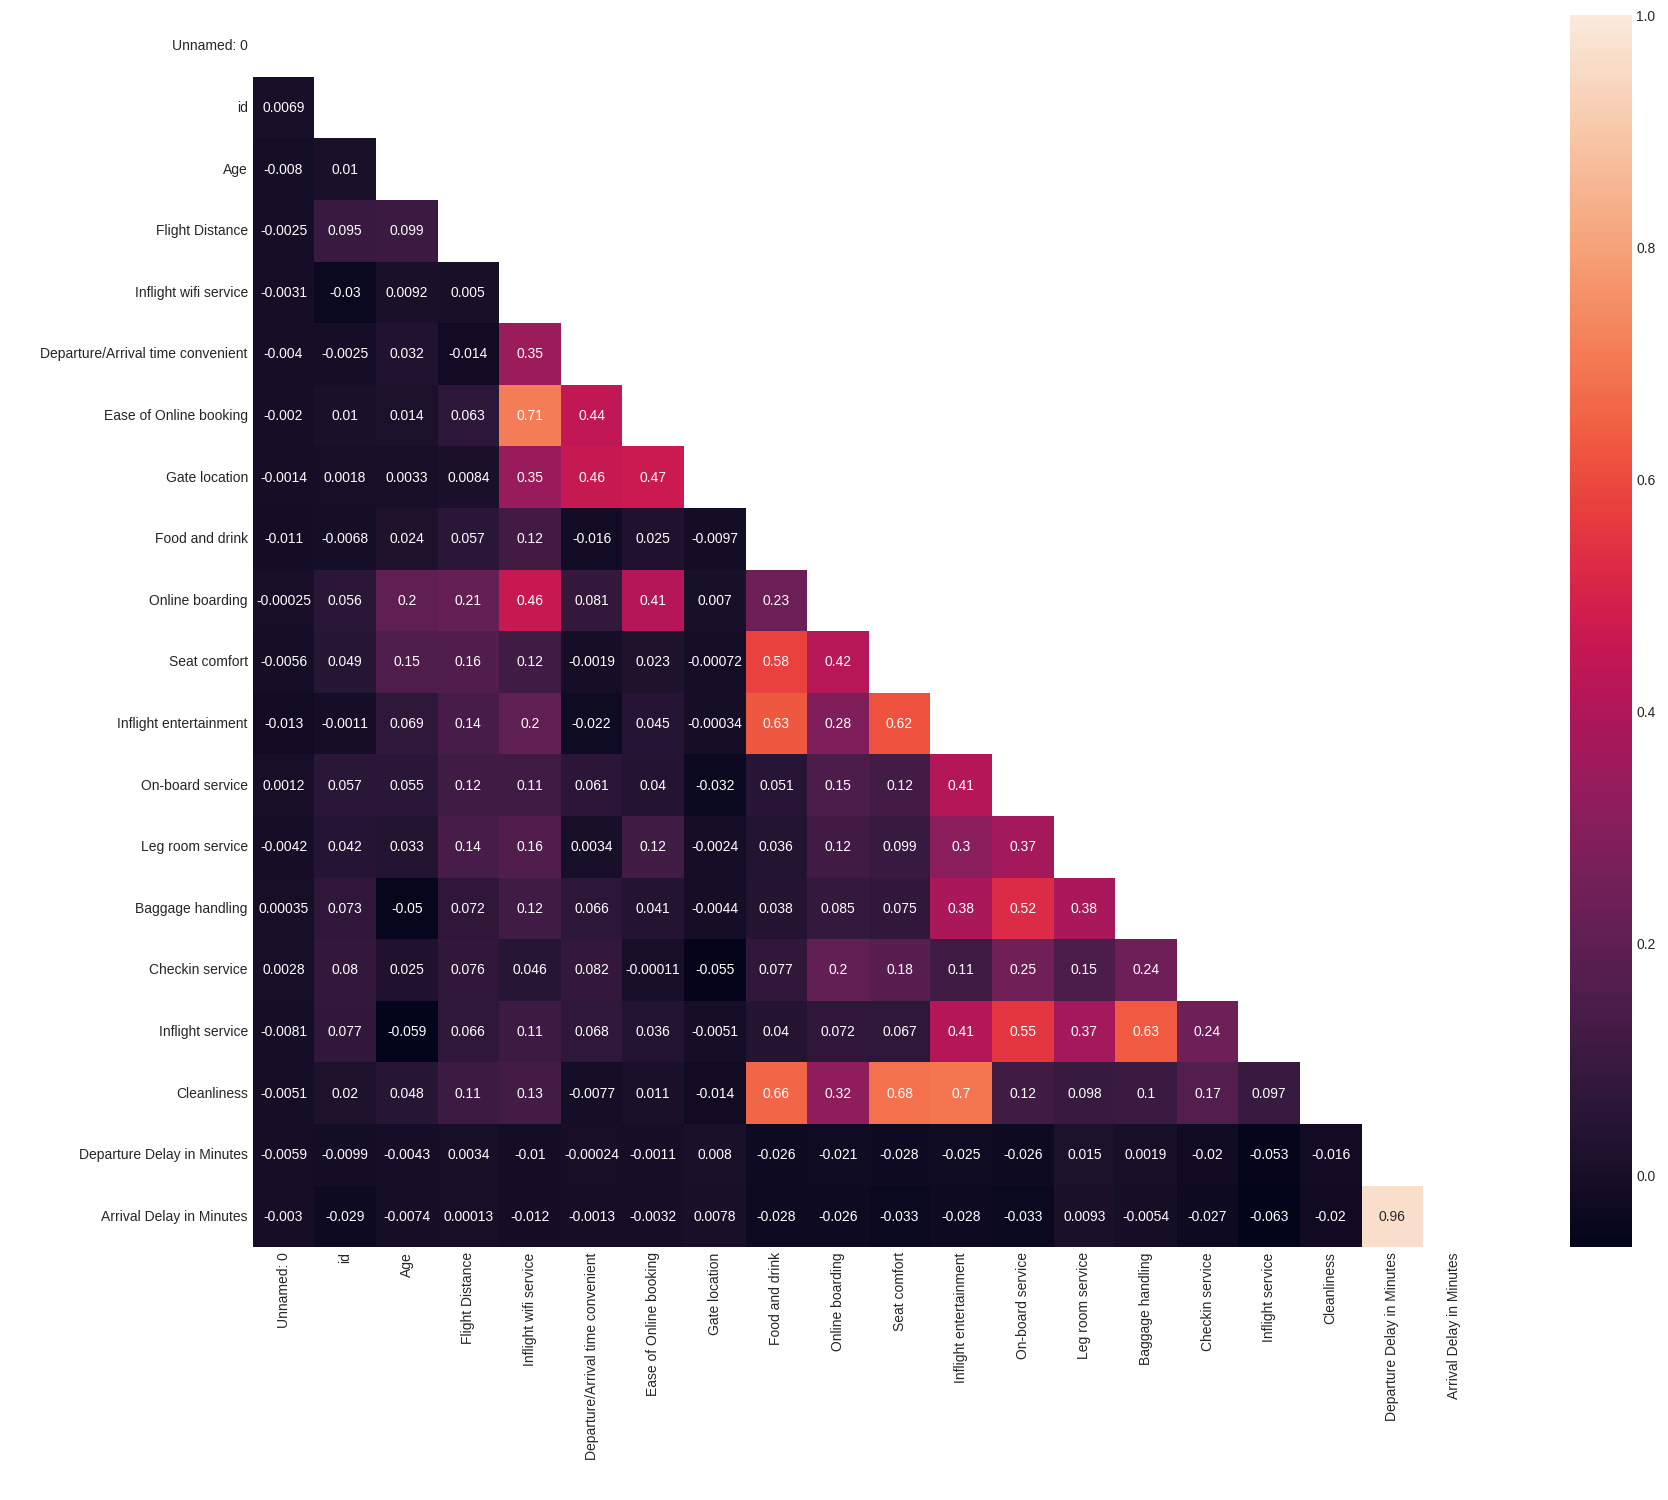

In [ ]:
mask = np.zeros_like(df.select_dtypes(include='number').corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(22, 16))
    ax = sns.heatmap(df.select_dtypes(include='number').corr(), mask=mask, vmax=1, square=True, annot=True)

#Klasyfikacja

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/test.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
dict_satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}

df_train['satisfaction'] = df_train['satisfaction'].map(dict_satisfaction)
df_test['satisfaction'] = df_test['satisfaction'].map(dict_satisfaction)

In [ ]:
df_train = df_train.drop(columns=['id', 'Unnamed: 0'])
df_test = df_test.drop(columns=['id', 'Unnamed: 0'])

In [ ]:
dict_fill = {'Arrival Delay in Minutes': df_train['Arrival Delay in Minutes'].median()}
df_train = df_train.fillna(dict_fill)
df_test = df_test.fillna(dict_fill)

In [ ]:
# Podzielimy dane na cechy (X) i zmienną docelową (y)
X_train, y_train, X_test, y_test = df_train.drop(
    columns=['satisfaction']), df_train['satisfaction'], df_test.drop(
        columns=['satisfaction']), df_test['satisfaction']

In [ ]:
X_train[:2]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0


In [ ]:
y_train[:2]

,satisfaction
0,1
1,1


In [ ]:
categorical_features = X_train.select_dtypes(
    object).columns.tolist()

X_train[categorical_features] = X_train[categorical_features].apply(
    lambda col: col.astype('category'))
X_test[categorical_features] = X_test[categorical_features].apply(
    lambda col: col.astype('category'))

#Trenowanie modelu

In [ ]:
from lightgbm import LGBMClassifier
# Tworzymy i trenujemy model LightGBM
clf = LGBMClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11403, number of negative: 14573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 25976, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(class_weight='balanced', random_state=42)

#Ocena modelu

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
# ROC AUC score dla danych treningowych
roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
print(f"ROC AUC (train): {roc_auc:.4f}")

# F1 score dla danych treningowych
f1 = f1_score(y_train, clf.predict(X_train))
print(f"F1 (train): {f1:.4f}")

ROC AUC (train): 0.9978
F1 (train): 0.9704


In [ ]:
y_pred = clf.predict(X_test)  # Prognozy dla danych testowych
y_score = clf.predict_proba(X_test)  # Przewidywane prawdopodobieństwa

# ROC AUC score dla danych testowych
roc_auc_test = roc_auc_score(y_test, y_score[:, 1])
print(f"ROC AUC (test): {roc_auc_test:.4f}")

# F1 score dla danych testowych
f1_test = f1_score(y_test, y_pred)
print(f"F1 (test): {f1_test:.4f}")

ROC AUC (test): 0.9978
F1 (test): 0.9704


#Znaczenie cech

In [ ]:
clf.feature_importances_

array([ 12, 159, 254, 125, 144, 245, 447,  64,  40, 114,  40, 151, 128,
       147, 104, 109, 176, 126, 144, 104,  78,  89], dtype=int32)

<ipython-input-15-4d682d4dd303>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


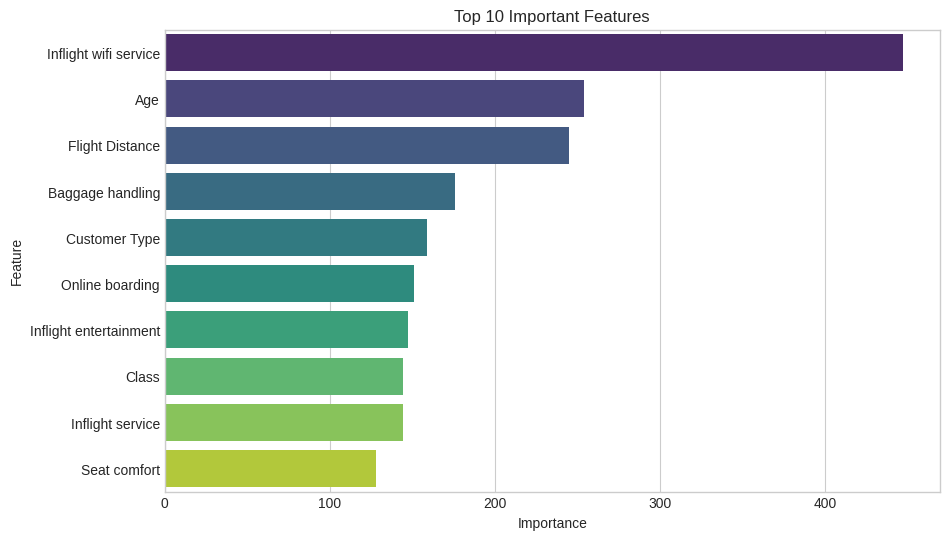

In [ ]:
# obliczamy znaczenie cech
importances = clf.feature_importances_

# tworzymy DataFrame dla wygody
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# sortujemy cechy według znaczenia malejąco
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# top 10 cech
top_features = feature_importance_df.head(10)

# wizualizujemy top 10 cech za pomocą seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Podsumowanie

Analiza wskazuje, że najważniejszym czynnikiem wpływającym na satysfakcję pasażerów jest dostępność Wi-Fi na pokładzie. Zapewnienie stabilnego i łatwego w użyciu połączenia internetowego może znacząco poprawić odbiór podróży.


Kolejnymi istotnymi zmiennymi są wiek podróżujących oraz długość przebytego dystansu. Różnice w preferencjach i oczekiwaniach pasażerów w różnych grupach wiekowych oraz na różnych trasach mogą odgrywać znaczącą rolę w kształtowaniu ich ogólnego zadowolenia.


Aspekty takie jak łatwość rezerwacji online, jakość obsługi bagażu oraz dostępność rozrywki podczas lotu mają kluczowe znaczenie w przewidywaniu satysfakcji pasażerów. Widoczne różnice pomiędzy grupami wskazują, że poprawa tych elementów może pozytywnie wpłynąć na doświadczenia pasażerów.


Istotnym czynnikiem jest również przynależność do segmentu klientów. Analiza sugeruje, że lojalni klienci mogą mieć inne oczekiwania w porównaniu z pasażerami korzystającymi z usług linii po raz pierwszy.


Podsumowując, linie lotnicze powinny inwestować w poprawę komfortu podróży oraz jakości obsługi na pokładzie. Inicjatywy w tych obszarach mogą prowadzić do wzrostu satysfakcji i lojalności pasażerów.